# Assignment Day 11
Correlation between Attrition and other variables

In [1]:
import pandas as pd 
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv('general_data.csv')

In [3]:
d.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [4]:
d.T

,0,1,2,3,4,5,6,7,8,9,...,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409
Age,51,31,32,38,32,46,28,29,31,25,...,37,45,37,39,29,42,29,25,42,40
Attrition,No,Yes,No,No,No,No,Yes,No,No,No,...,No,No,Yes,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,...,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,6,10,17,2,10,8,11,18,1,7,...,22,21,2,22,4,5,2,25,18,28
Education,2,1,4,5,1,3,2,3,3,4,...,5,1,3,3,3,4,4,2,2,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeID,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
Gender,Female,Female,Male,Male,Male,Female,Male,Male,Male,Female,...,Female,Male,Male,Female,Female,Female,Male,Male,Male,Male


In [5]:
d.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:

d.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [7]:

d.drop_duplicates().T

,0,1,2,3,4,5,6,7,8,9,...,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409
Age,51,31,32,38,32,46,28,29,31,25,...,37,45,37,39,29,42,29,25,42,40
Attrition,No,Yes,No,No,No,No,Yes,No,No,No,...,No,No,Yes,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,...,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,6,10,17,2,10,8,11,18,1,7,...,22,21,2,22,4,5,2,25,18,28
Education,2,1,4,5,1,3,2,3,3,4,...,5,1,3,3,3,4,4,2,2,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeID,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
Gender,Female,Female,Male,Male,Male,Female,Male,Male,Male,Female,...,Female,Male,Male,Female,Female,Female,Male,Male,Male,Male


In [8]:
d['Attrition'] = d['Attrition'].map({'Yes' : 1, 'No' : 0})
d.T

,0,1,2,3,4,5,6,7,8,9,...,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409
Age,51,31,32,38,32,46,28,29,31,25,...,37,45,37,39,29,42,29,25,42,40
Attrition,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,...,Travel_Rarely,Travel_Frequently,Travel_Frequently,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,6,10,17,2,10,8,11,18,1,7,...,22,21,2,22,4,5,2,25,18,28
Education,2,1,4,5,1,3,2,3,3,4,...,5,1,3,3,3,4,4,2,2,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EmployeeID,1,2,3,4,5,6,7,8,9,10,...,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410
Gender,Female,Female,Male,Male,Male,Female,Male,Male,Male,Female,...,Female,Male,Male,Female,Female,Female,Male,Male,Male,Male


# The correlation of attrition and age

In [9]:
stats, p = pearsonr(d.Attrition, d.Age)
print(stats, p)

-0.15920500686577507 1.996801615893171e-26


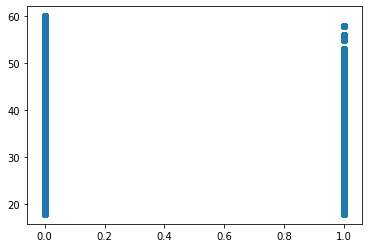

In [14]:
plt.scatter(d['Attrition'], d['Age'])

Here,r is negative so there is a negative relation between Age and attrition

and as p <0.05 so null hypothesis (H0) is rejected and we find that there is a weak negative correlation between attrition and age

# The correlation of attrition and  DistanceFromHome


-0.009730141010179438 0.5182860428049617


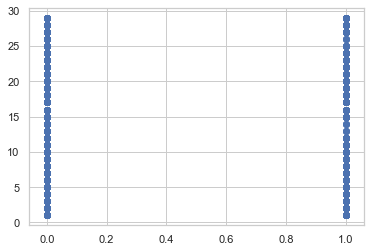

In [27]:
stats, p = pearsonr(d.Attrition, d.DistanceFromHome)
print(stats, p)
plt.scatter(d['Attrition'], d['DistanceFromHome'])

Here p is greater than 0.05 hence we accept the null hypothesis (H0) that there is no relation between attrition and distance from home

# The correlation of attrition and Education

-0.015111167710968734 0.3157293177118575


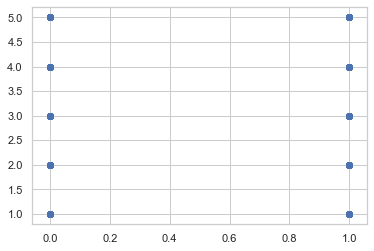

In [28]:
stats, p = pearsonr(d.Attrition, d.Education)
print(stats, p)
plt.scatter(d['Attrition'], d['Education'])

here P is less than 0.5, hence we reject the null hypothesis  and we find that there is a weak negative correlation between attrition and Edu

In [ ]:

stats, p = pearsonr(d.Attrition, d.)
print(stats, p)
plt.scatter(d['Attrition'], d[''])

# The correlation of attrition and MonthlyIncome

-0.031176281698114025 0.0384274849060192


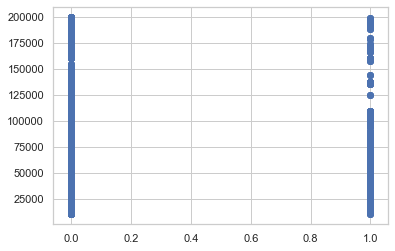

In [30]:
stats, p = pearsonr(d.Attrition, d.MonthlyIncome)
print(stats, p)
plt.scatter(d['Attrition'], d['MonthlyIncome'])

here P is less than 0.5, hence we reject the null hypothesis and we find that there is a small negative correlation between attrition and Income

# The correlation of attrition and The PercentSalaryHike

0.0325325948910522 0.030743386433369824


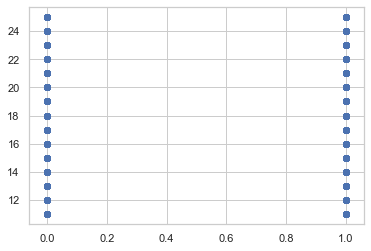

In [35]:
stats, p = pearsonr(d.Attrition, d.PercentSalaryHike)
print(stats, p)
plt.scatter(d['Attrition'], d['PercentSalaryHike'])

As p is lesser than .05 we reject null hypothesis (H0) and conclude that there is a significant relation between Attrition and salary hike percent .

r is 0.032 so we see there is positive relation between the two

# The correlation of attrition and TrainingTimesLastYear

-0.049430576244253066 0.001024706191536548


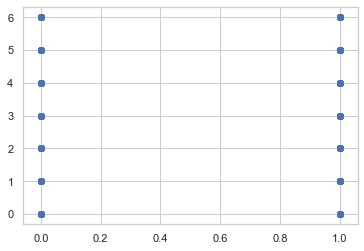

In [37]:
stats, p = pearsonr(d.Attrition, d.TrainingTimesLastYear)
print(stats, p)
plt.scatter(d['Attrition'], d['TrainingTimesLastYear'])

As p is lesser than .05 we reject null hypothesis (H0) and conclude that there is a slight level of negative coefficeint between the two parameters